<a href="https://colab.research.google.com/github/AdityaPatidaroo7/Aditya-/blob/main/Text_summarizaton_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [21]:
book=pd.read_excel("/content/Mindset_data_ch.csv",index_col=0)
book

,Text
index,
1,"When I was a young researcher, just starting o..."
2,"Since the dawn of time, people have thought di..."
3,Itâ€™s one thing to have pundits spouting thei...
4,Iâ€™ve seen so many people with this one consu...
5,To give you a better sense of how the two mind...
6,Is this such a novel idea? We have lots of say...
7,We often see books with titles like The Ten Se...
8,But it was those with the fixed mindset who ac...
9,1. Your intelligence is something very basic a...


In [23]:
#removing the leading and trailing characters
book= [text.strip() for text in book.Text]
#removing the empty strings
book = [text for text in book if text]

In [24]:
# Joining the list into one string/text
text = ' '.join(book)
text

'When I was a young researcher, just starting out, something happened that changed my life. I was obsessed with understanding how people cope with failures, and I decided to study it by watching how students grapple with hard problems. So I brought children one at a time to a room in their school, made them comfortable, and then gave them a series of puzzles to solve. The first ones were fairly easy, but the next ones were hard. As the students grunted, perspired, and toiled, I watched their strategies and probed what they were thinking and feeling. I expected differences among children in how they coped with the difficulty, but I saw something I never expected. Confronted with the hard puzzles, one ten-year-old boy pulled up his chair, rubbed his hands together, smacked his lips, and cried out, â€œI love a challenge!â€\x9d Another, sweating away on these puzzles, looked up with a pleased expression and said with authority, â€œYou know, I was hoping this would be informative!â€\x9d Wha

In [25]:
#Punctuation
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'When I was a young researcher just starting out something happened that changed my life I was obsessed with understanding how people cope with failures and I decided to study it by watching how students grapple with hard problems So I brought children one at a time to a room in their school made them comfortable and then gave them a series of puzzles to solve The first ones were fairly easy but the next ones were hard As the students grunted perspired and toiled I watched their strategies and probed what they were thinking and feeling I expected differences among children in how they coped with the difficulty but I saw something I never expected Confronted with the hard puzzles one tenyearold boy pulled up his chair rubbed his hands together smacked his lips and cried out â€œI love a challengeâ€\x9d Another sweating away on these puzzles looked up with a pleased expression and said with authority â€œYou know I was hoping this would be informativeâ€\x9d Whatâ€™s wrong with them I wonde

In [26]:

import nltk
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
#Tokenization
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['When', 'I', 'was', 'a', 'young', 'researcher', 'just', 'starting', 'out', 'something', 'happened', 'that', 'changed', 'my', 'life', 'I', 'was', 'obsessed', 'with', 'understanding', 'how', 'people', 'cope', 'with', 'failures', 'and', 'I', 'decided', 'to', 'study', 'it', 'by', 'watching', 'how', 'students', 'grapple', 'with', 'hard', 'problems', 'So', 'I', 'brought', 'children', 'one', 'at', 'a', 'time', 'to', 'a', 'room']


In [28]:
len(text_tokens)

21922

In [29]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['When', 'I', 'young', 'researcher', 'starting', 'something', 'happened', 'changed', 'life', 'I', 'obsessed', 'understanding', 'people', 'cope', 'failures', 'I', 'decided', 'study', 'watching', 'students', 'grapple', 'hard', 'problems', 'So', 'I', 'brought', 'children', 'one', 'time', 'room', 'school', 'made', 'comfortable', 'gave', 'series', 'puzzles', 'solve', 'The', 'first', 'ones']


In [30]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['when', 'i', 'young', 'researcher', 'starting', 'something', 'happened', 'changed', 'life', 'i', 'obsessed', 'understanding', 'people', 'cope', 'failures', 'i', 'decided', 'study', 'watching', 'students', 'grapple', 'hard', 'problems', 'so', 'i']


In [31]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['when', 'i', 'young', 'research', 'start', 'someth', 'happen', 'chang', 'life', 'i', 'obsess', 'understand', 'peopl', 'cope', 'failur', 'i', 'decid', 'studi', 'watch', 'student', 'grappl', 'hard', 'problem', 'so', 'i', 'brought', 'children', 'one', 'time', 'room', 'school', 'made', 'comfort', 'gave', 'seri', 'puzzl', 'solv', 'the', 'first', 'one']


In [32]:
# NLP english language model of spacy library
nlp = spacy.load('en') 

In [33]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

When I young researcher starting something happened changed life I obsessed understanding people cope failures I decided study watching students grapple hard problems So I brought children one time room school made comfortable gave series puzzles solve The first ones


In [34]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['when', '-PRON-', 'young', 'researcher', 'start', 'something', 'happen', 'change', 'life', '-PRON-', 'obsess', 'understand', 'people', 'cope', 'failure', '-PRON-', 'decide', 'study', 'watch', 'student', 'grapple', 'hard', 'problem', 'so', '-PRON-']


Feature Extraction

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [36]:
print(vectorizer.vocabulary_)

{'when': 2891, 'pron': 2067, 'young': 2978, 'researcher': 2196, 'start': 2478, 'something': 2438, 'happen': 1205, 'change': 397, 'life': 1529, 'obsess': 1804, 'understand': 2786, 'people': 1905, 'cope': 551, 'failure': 970, 'decide': 639, 'study': 2528, 'watch': 2869, 'student': 2526, 'grapple': 1161, 'hard': 1208, 'problem': 2046, 'so': 2421, 'bring': 324, 'child': 418, 'one': 1820, 'time': 2683, 'room': 2239, 'school': 2275, 'make': 1596, 'comfortable': 483, 'give': 1134, 'series': 2327, 'puzzle': 2093, 'solve': 2429, 'the': 2638, 'first': 1030, 'fairly': 973, 'easy': 804, 'next': 1769, 'as': 165, 'grunt': 1181, 'perspire': 1928, 'toil': 2696, 'strategy': 2514, 'probe': 2045, 'think': 2654, 'feeling': 1003, 'expect': 942, 'difference': 702, 'among': 119, 'difficulty': 708, 'see': 2306, 'never': 1765, 'confront': 521, 'tenyearold': 2625, 'boy': 309, 'pull': 2085, 'chair': 390, 'rub': 2243, 'hand': 1197, 'together': 2695, 'smack': 2411, 'lip': 1542, 'cry': 597, 'œi': 3034, 'love': 1575

In [37]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['administer', 'admire', 'admission', 'admit', 'adolescence', 'adolescent', 'adopt', 'adorable', 'adoration', 'adorn', 'adult', 'advance', 'advanced', 'advantage', 'advice', 'advise', 'aesop', 'affect', 'affection', 'affirmation', 'afford', 'afraid', 'after', 'afterâ', 'again', 'againâ', 'age', 'agenda', 'agent', 'ago', 'agonizing', 'agree', 'agreement', 'ah', 'aha', 'ahead', 'aheadâ', 'ainâ', 'air', 'alarm', 'albert', 'alfred', 'algebra', 'algebraic', 'alien', 'all', 'allege', 'allout', 'allow', 'alltime']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
print(X.toarray().shape)

(13589, 3099)


Let's see how can bigrams and trigrams can be included here

In [39]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book)

In [40]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['ability', 'about', 'all', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'could', 'did', 'do', 'donâ', 'effort', 'fixed', 'fixed mindset', 'for', 'from', 'growth', 'growth mindset', 'had', 'have', 'he', 'her', 'his', 'how', 'if', 'in', 'in the', 'into', 'is', 'it', 'itâ', 'just', 'know', 'learning', 'like', 'me', 'mindset', 'more', 'my', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'out', 'over', 'people', 'people with', 're', 'really', 'said', 'she', 'so', 'some', 'something', 'students', 'test', 'than', 'that', 'the', 'the fixed', 'the fixed mindset', 'the growth', 'the growth mindset', 'their', 'them', 'then', 'there', 'these', 'they', 'theyâ', 'think', 'this', 'time', 'to', 'to be', 'up', 'was', 'way', 'we', 'were', 'what', 'when', 'who', 'with', 'with the', 'with the fixed', 'work', 'would', 'you', 'your', 'youâ', 'youâ re']
[[0 0 0 ... 0 0 0]
 [0 2 1 ... 0 0 0]
 [0 2 0 ... 4 1 0]
 ...
 [7 1 3 ... 0 0 0]
 [3 2 3 ... 0 0 0]
 [3 1 4 ... 0 0 0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


TFidf vectorizer

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['abilities', 'ability', 'about', 'about the', 'achievement', 'after', 'again', 'age', 'agree', 'all', 'all the', 'already', 'also', 'always', 'am', 'an', 'and', 'and how', 'and it', 'and over', 'and the', 'and then', 'and they', 'another', 'any', 'anyone', 'are', 'are you', 'as', 'as they', 'as you', 'asked', 'at', 'at the', 'away', 'back', 'bad', 'be', 'because', 'become', 'been', 'before', 'being', 'belief', 'believe', 'believed', 'best', 'better', 'better than', 'big', 'book', 'born', 'both', 'brain', 'but', 'but not', 'but they', 'by', 'by the', 'came', 'can', 'can be', 'canâ', 'challenge', 'change', 'changed', 'child', 'children', 'choice', 'class', 'clear', 'college', 'confidence', 'could', 'couldnâ', 'course', 'day', 'develop', 'developed', 'did', 'did not', 'didnâ', 'different', 'do', 'do it', 'do you', 'does', 'doesnâ', 'doing', 'donâ', 'donâ have', 'down', 'each', 'early', 'easy', 'effort', 'effort is', 'english', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Generate wordcloud

In [42]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

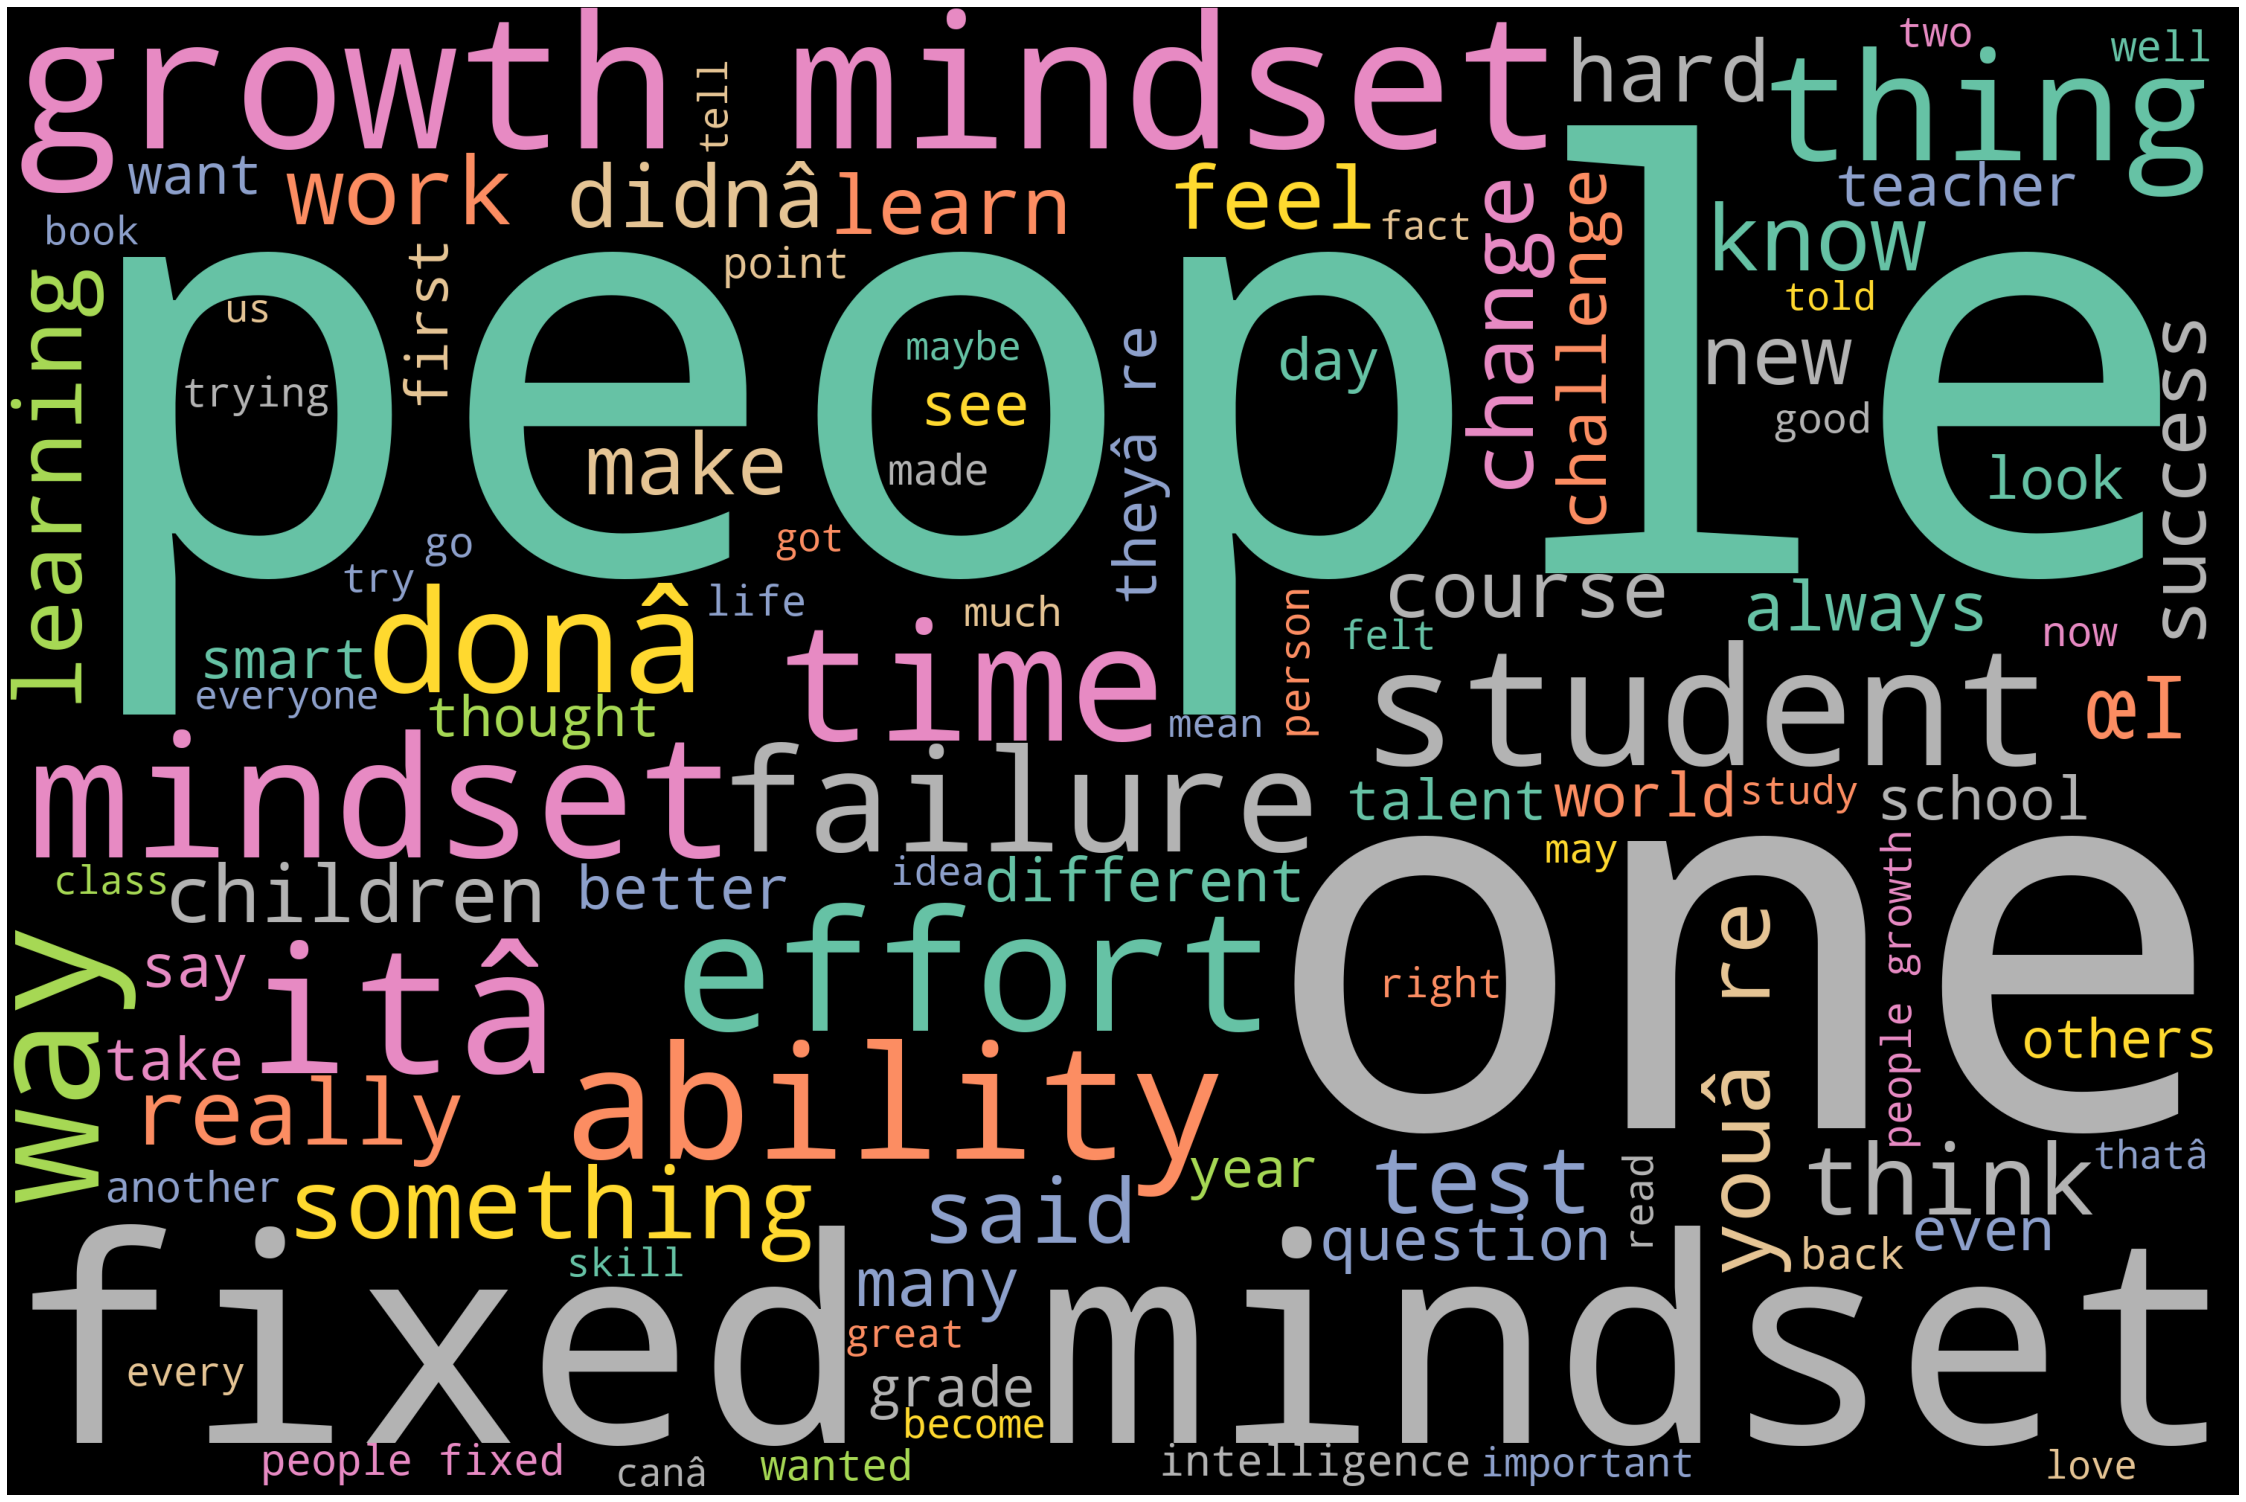

In [43]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)